In [2]:
from sklearn.datasets import load_sample_images
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [3]:
model = tf.keras.applications.ResNet50(weights="imagenet")

102967424/102967424 [==============================] - 9s 0us/step


35363/35363 [==============================] - 0s 0us/step
Image #0
  n03877845 - palace       54.69%
  n03781244 - monastery    24.71%
  n02825657 - bell_cote    18.55%
  n02980441 - castle       0.77%
  n04346328 - stupa        0.36%
Image #1
  n04522168 - vase         32.67%
  n11939491 - daisy        17.82%
  n03530642 - honeycomb    12.04%
  n13040303 - stinkhorn    4.33%
  n07930864 - cup          4.21%


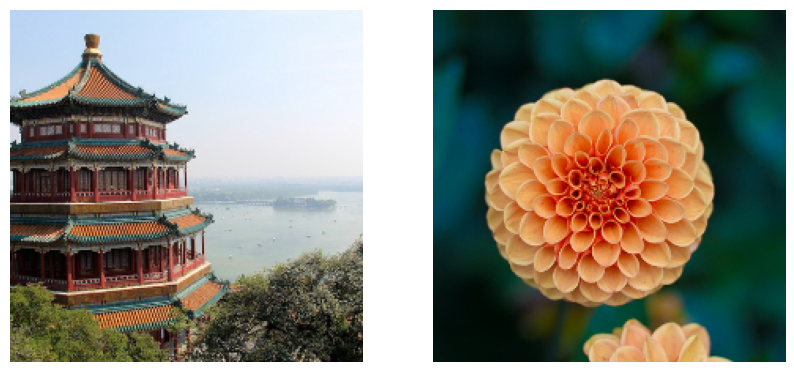

In [4]:
images = load_sample_images()["images"]
images_resized = tf.keras.layers.Resizing(height=224, width=224,
                                          crop_to_aspect_ratio=True)(images)

inputs = tf.keras.applications.resnet50.preprocess_input(images_resized)


Y_proba = model.predict(inputs)

top_K = tf.keras.applications.resnet50.decode_predictions(Y_proba, top=5)
for image_index in range(len(images)):
    print(f"Image #{image_index}")
    for class_id, name, y_proba in top_K[image_index]:
        print(f"  {class_id} - {name:12s} {y_proba:.2%}")


plt.figure(figsize=(10, 6))
for idx in (0, 1):
    plt.subplot(1, 2, idx + 1)
    plt.imshow(images_resized[idx] / 255)
    plt.axis("off")

plt.show()

